<a href="https://colab.research.google.com/github/SID1060/DataGlimpse/blob/main/Amazon_Bestselling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data = '/content/bestsellers with categories.csv'
df = pd.read_csv(data)

In [77]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [79]:
#data cleaning by set the gap as null
missing = df.isnull().sum()

summary= df.describe()
print(summary)


       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000


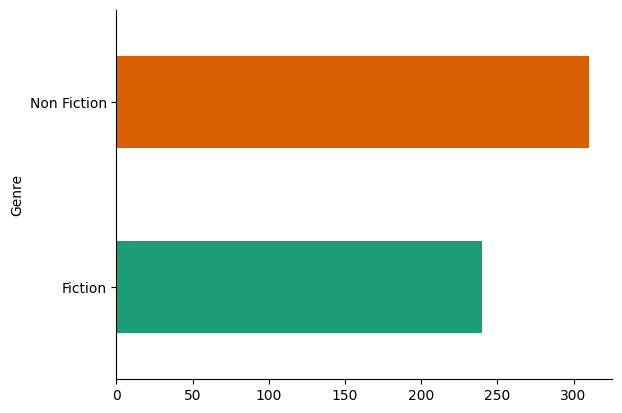

In [80]:
df.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

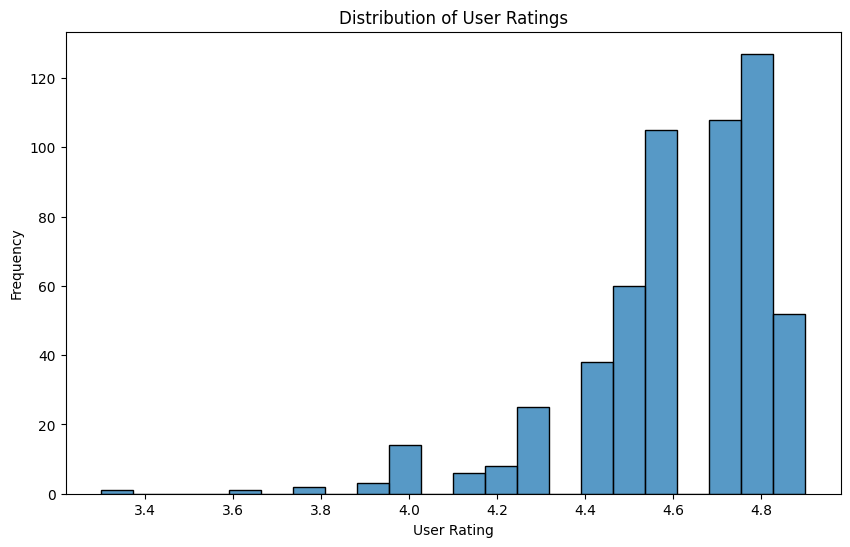

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(df['User Rating'])
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

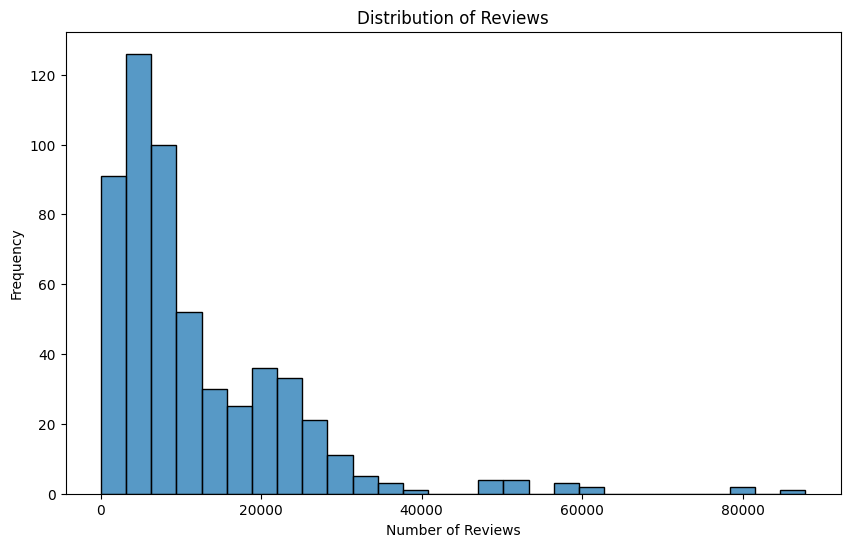

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Reviews'])
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

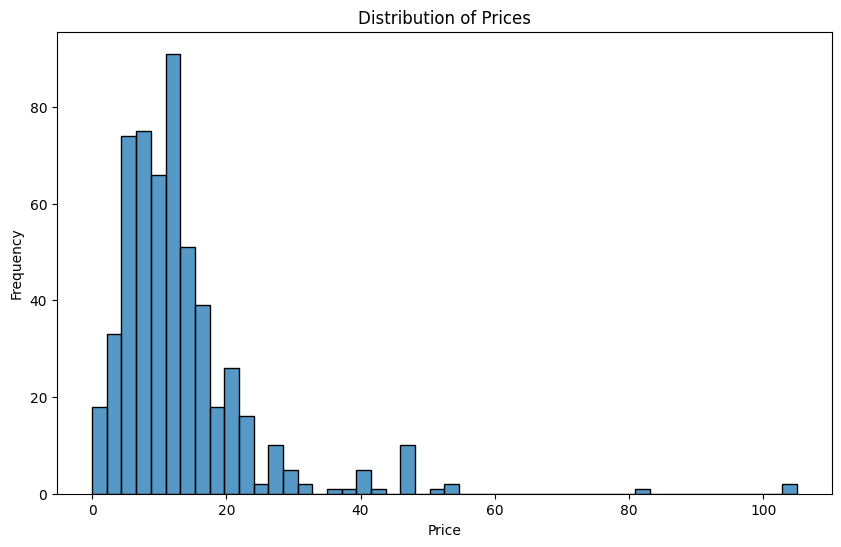

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'])
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

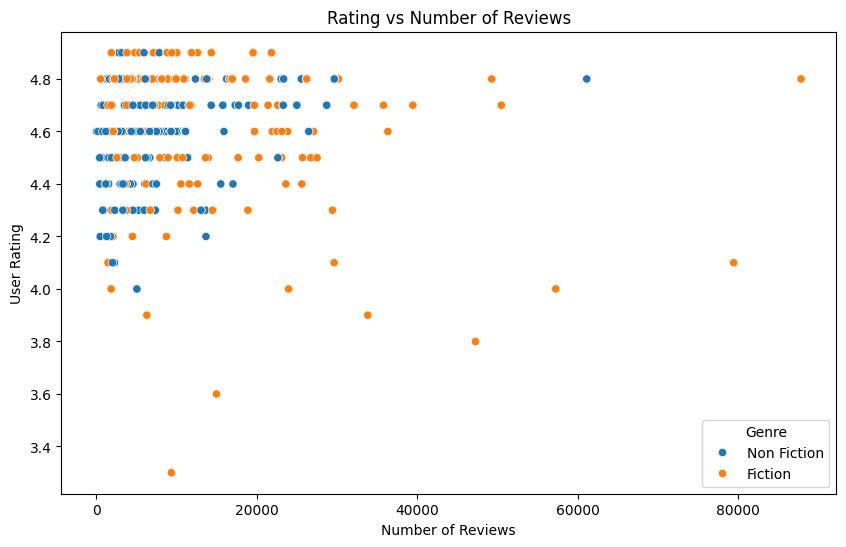

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='User Rating', hue='Genre', data=df)
plt.title('Rating vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('User Rating')
plt.show()

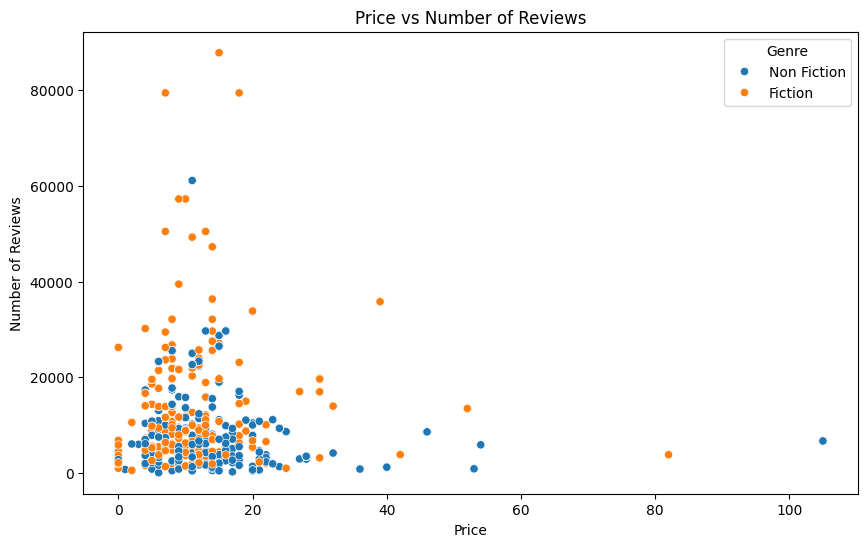

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Reviews', hue='Genre', data=df)
plt.title('Price vs Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()

In [87]:
# genre_map = {'Non Fiction':0,'Fiction':1}
# df['Genre'] = df['Genre'].replace(genre_map)
# df.head()

In [74]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
df = pd.read_csv('/content/bestsellers with categories.csv')

In [90]:
df = df[['Genre', 'User Rating']]
df = df.dropna()

In [91]:
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)
X = df.drop('User Rating', axis=1)
y = df['User Rating']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [94]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.05699675220338794
R-squared: 0.006538891297905525


Model's predictions are relatively close to the actual user ratings (as indicated by the low MSE), the model does not explain much of the variance in user ratings (as indicated by the low 𝑅2). This suggests that the 'Genre' feature alone is not a strong predictor of user ratings.

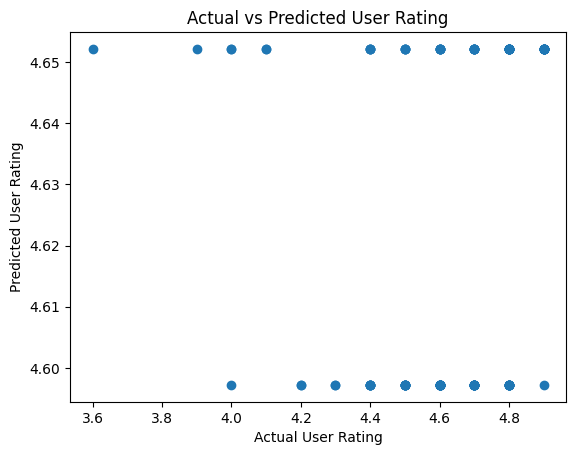

In [96]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual User Rating')
plt.ylabel('Predicted User Rating')
plt.title('Actual vs Predicted User Rating')
plt.show()

In [111]:
df = pd.read_csv('/content/bestsellers with categories.csv')
df = df.drop(['Name', 'Author'], axis=1)
df = df.dropna()
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)
X = df.drop('User Rating', axis=1)
y = df['User Rating']

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0526968042711114
R-squared: 0.08148756600338847


In [110]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                   Coefficient
Reviews              -0.022895
Price                -0.017257
Year                  0.059617
Genre_Non Fiction    -0.033272


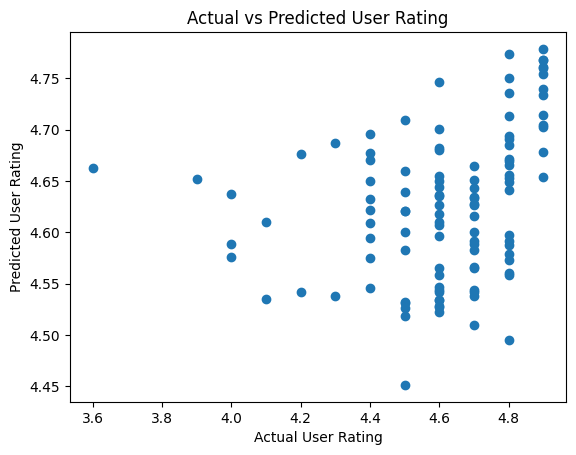

In [108]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual User Rating')
plt.ylabel('Predicted User Rating')
plt.title('Actual vs Predicted User Rating')
plt.show()

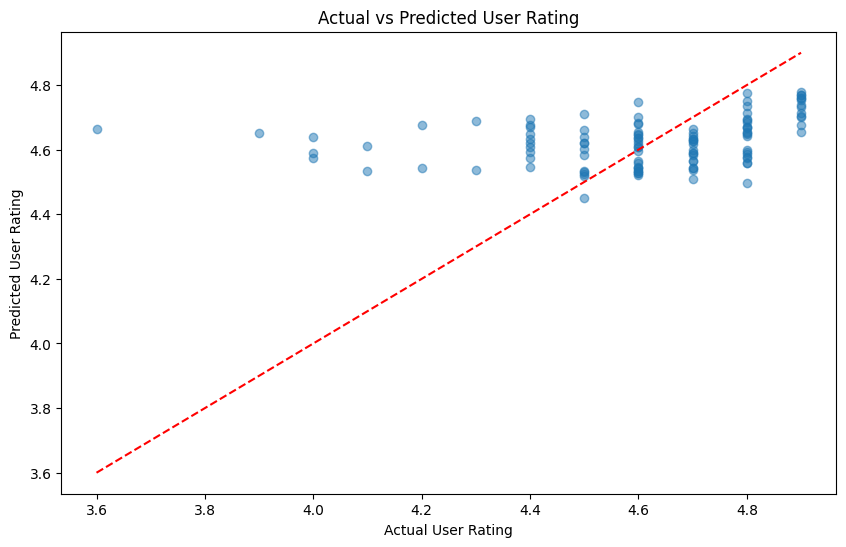

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle='--')
plt.xlabel('Actual User Rating')
plt.ylabel('Predicted User Rating')
plt.title('Actual vs Predicted User Rating')
plt.show()
